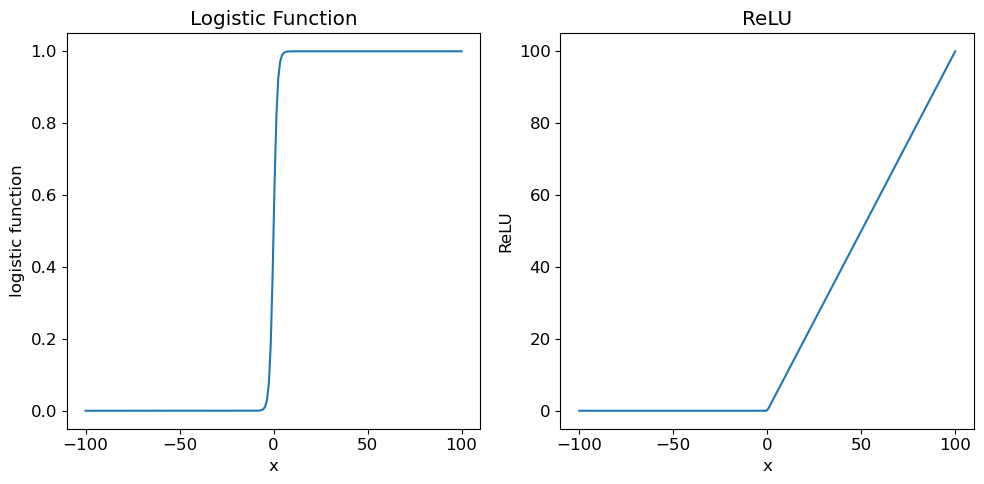

In [1]:
##practice_pytorch_intro_neural_network_workshop_code_reproduced

#TASK: Creating and plotting Logistic function and ReLU  

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Adjust the figure size and font size
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams.update({'font.size': 12})

## Generate the x values
x = torch.linspace(-100, 100, 200)

## Define the logistic function using PyTorch

def logistic_fn(x):
    return 1 / (1 + torch.exp(-x))

# Calculate the logistic function values

l = logistic_fn(x)

# Plot the logistic function
plt.subplot(1, 2, 1)
plt.plot(x, l)
plt.title('Logistic Function')
plt.xlabel("x")
plt.ylabel("logistic function")

## Define and plot the ReLU function using PyTorch

ReLU = F.relu(x)

plt.subplot(1, 2, 2)
plt.plot(x, ReLU)
plt.title("ReLU")
plt.xlabel("x")
plt.ylabel("ReLU")

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

torch.Size([55]) torch.Size([55])


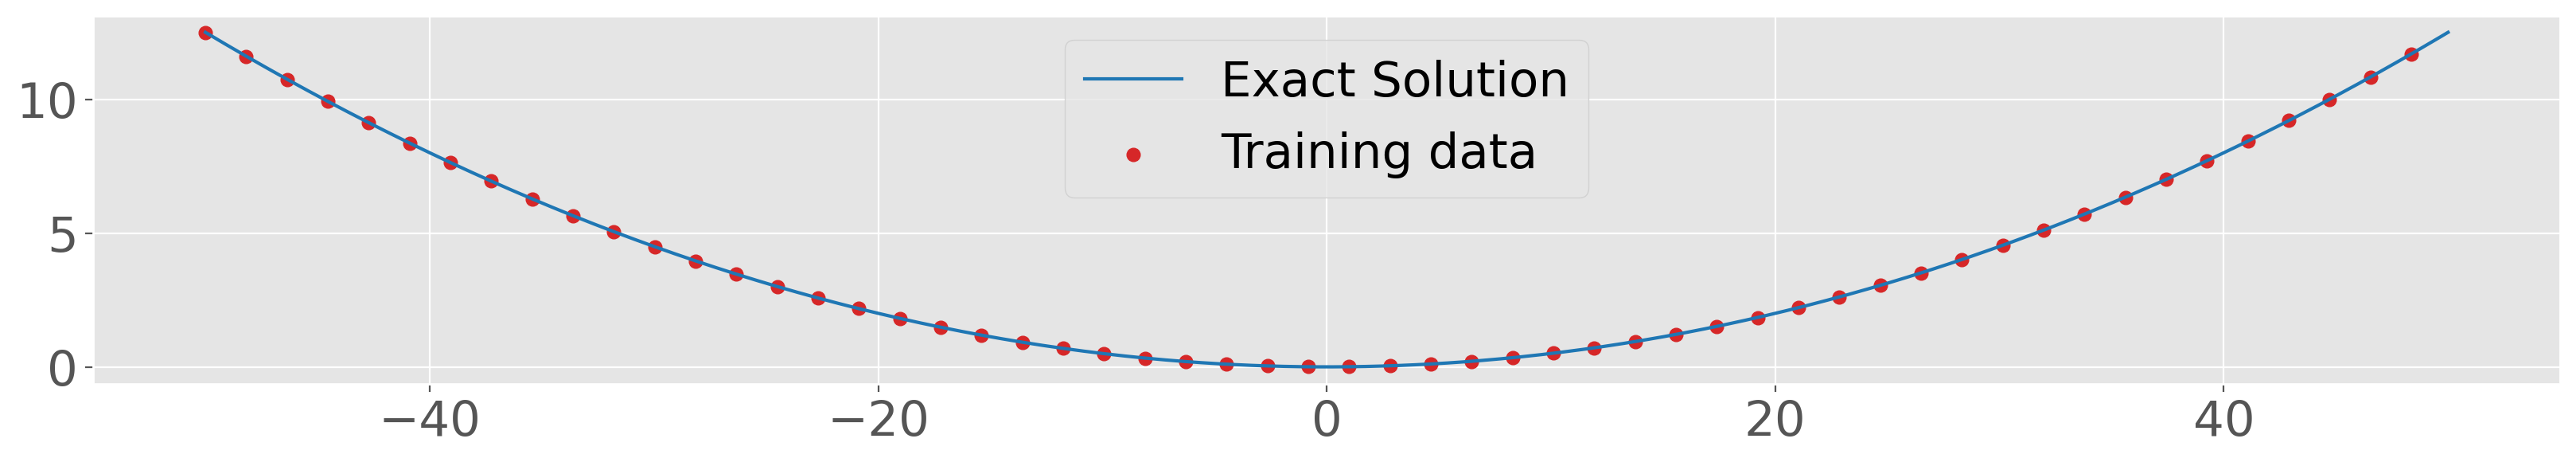

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 

plt.style.use('ggplot')

matplotlib.rcParams['figure.dpi'] = 200  # highres display
plt.rcParams["figure.figsize"] = (20, 3)
plt.rcParams.update({'font.size': 22})

# Generating random data first and then adding the noise

# There will be ndata data points ranging from 0 to 50
ndata = 550
x = np.linspace(-50, 50, ndata)
#print (x)

# Adding noise to the random linear data
y = x**2 / 200  # + np.random.uniform(-4, 4, 550)
#print(y)

n = len(x)  # Number of data points

# slice out a small number of points from the LHS of the domain
x_data = torch.tensor(x[0:550:10], dtype=torch.float32)
y_data = torch.tensor(y[0:550:10], dtype=torch.float32)
print(x_data.shape, y_data.shape)

plt.figure()
plt.plot(x, x**2 / 200, color="tab:blue", label="Exact Solution")
plt.scatter(x_data, y_data, color="tab:red", label="Training data")
plt.legend()
plt.show()

In [3]:
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, Dataset


# 1 Define the custom model class
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.fc1 = nn.Linear(1, 32)  # 1 input feature, 32 output features (neurons)
        self.fc2 = nn.Linear(32, 1)  # 32 input features, 1 output feature

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the model
model1 = Model1()

# 2 compile the model
#Define the loss function and optimizer

criterion = nn.MSELoss()
optimizer = optim.Adam(model1.parameters(), lr=1e-2)

# Print the model architecture
print(model1)

# Count total parameters, trainable parameters, and non-trainable parameters
total_params = sum(p.numel() for p in model1.parameters())
trainable_params = sum(p.numel() for p in model1.parameters() if p.requires_grad)
non_trainable_params = total_params - trainable_params

print(f"Total parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")
print(f"Non-trainable parameters: {non_trainable_params}")


Model1(
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
)
Total parameters: 97
Trainable parameters: 97
Non-trainable parameters: 0


In [4]:
import matplotlib.pyplot as plt

# 1 Define the custom model class in PyTorch
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.fc1 = nn.Linear(1, 32)  # 1 input feature, 32 output features (neurons)
        self.fc2 = nn.Linear(32, 1)  # 32 input features, 1 output feature

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 2 Create an instance of the PyTorch model
model1 = Model1()

# 3 Define the loss function and optimizer in PyTorch
criterion = nn.MSELoss()
optimizer = optim.Adam(model1.parameters(), lr=1e-2)

# 4 Create a custom performance callback class in PyTorch
class PerformanceCallback:
    def on_epoch_end(self, epoch):
        print("Performance callback executed at the end of epoch", epoch)

# Create an instance of the custom performance callback
performance = PerformanceCallback()

# 5 Implement the training loop to fit the model to the data
x_data = torch.linspace(-10, 10, 1000).unsqueeze(1)
y_data = x_data**2 / 200

# Training loop
epochs = 500
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model1(x_data)
    loss = criterion(outputs, y_data)
    loss.backward()
    optimizer.step()

    # Call the custom performance callback at the end of each epoch
    performance.on_epoch_end(epoch)

    # Print the loss after each epoch
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")
    

Performance callback executed at the end of epoch 0
Epoch 1/500, Loss: 1.0464969873428345
Performance callback executed at the end of epoch 1
Epoch 2/500, Loss: 0.19121240079402924
Performance callback executed at the end of epoch 2
Epoch 3/500, Loss: 0.05354616418480873
Performance callback executed at the end of epoch 3
Epoch 4/500, Loss: 0.23824039101600647
Performance callback executed at the end of epoch 4
Epoch 5/500, Loss: 0.36081036925315857
Performance callback executed at the end of epoch 5
Epoch 6/500, Loss: 0.3216221034526825
Performance callback executed at the end of epoch 6
Epoch 7/500, Loss: 0.20476043224334717
Performance callback executed at the end of epoch 7
Epoch 8/500, Loss: 0.0998494029045105
Performance callback executed at the end of epoch 8
Epoch 9/500, Loss: 0.04595976695418358
Performance callback executed at the end of epoch 9
Epoch 10/500, Loss: 0.04632677510380745
Performance callback executed at the end of epoch 10
Epoch 11/500, Loss: 0.0825357437133789


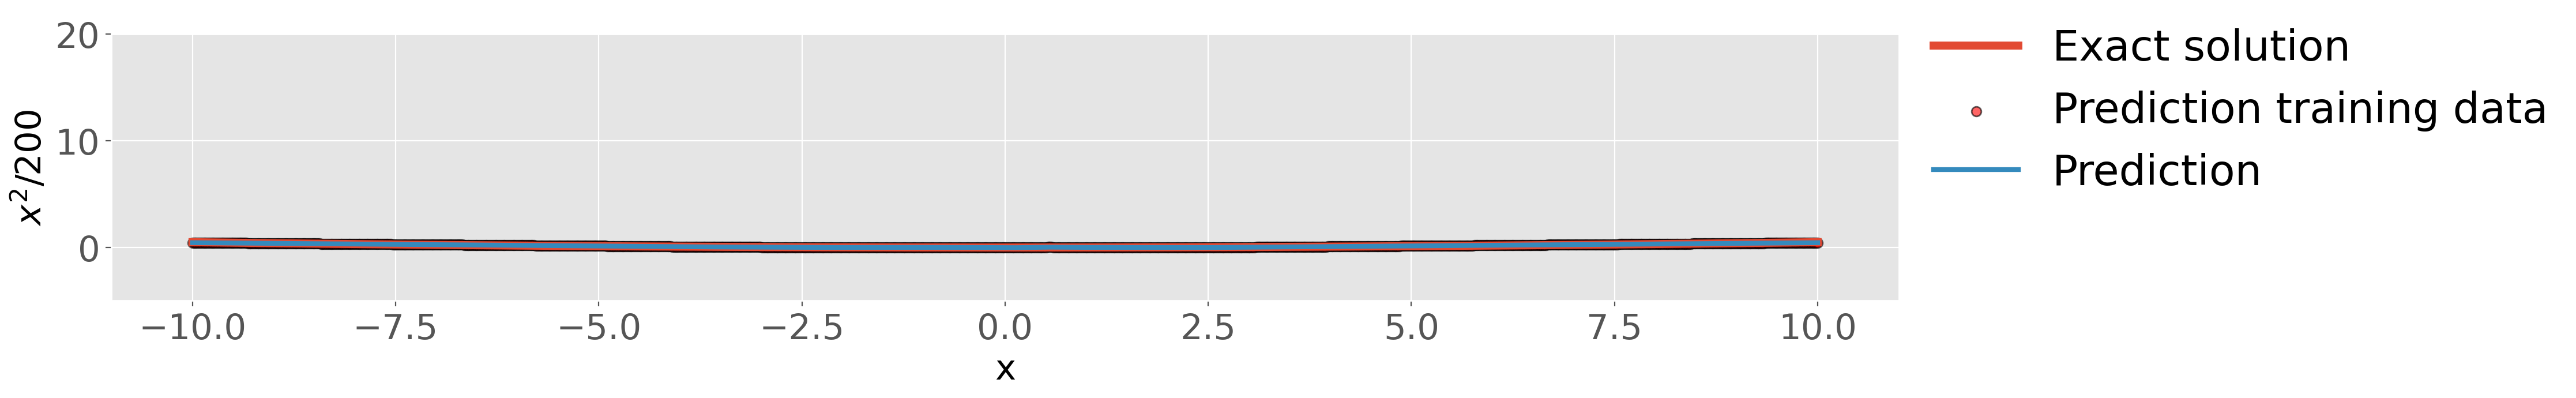

In [5]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_line


# 6 Use the trained model to make predictions and create the plot for visualization
plt.figure()
plt.plot(x_data, x_data**2 / 200, lw=5, label="Exact solution")
plt.scatter(x_data, model1(x_data).detach(), alpha=0.6, color='#FF0000', lw=1, ec='black', label="Prediction training data")
plt.plot(x_data, model1(x_data).detach(), lw=3, label="Prediction")
plt.ylim([-5, 20])
plt.xlabel('x')
plt.ylabel('$x^2/200$')
l = plt.legend(loc=(1.01, 0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")
plt.show()



In [6]:
#Model2
import torch
import torch.nn as nn

# Define the PyTorch model class
class PyTorchModel(nn.Module):
    def __init__(self):
        super(PyTorchModel, self).__init__()
        self.layer1 = nn.Linear(1, 132)
        self.layer2 = nn.Linear(132, 132)
        self.layer3 = nn.Linear(132, 132)
        self.layer4 = nn.Linear(132, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.layer4(x)
        return x

# Create an instance of the PyTorch model
model2_pytorch = PyTorchModel()

# Print the model summary (similar to Keras)
print(model2_pytorch)

# Define the loss function and optimizer for training
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model2_pytorch.parameters(), lr=1e-2)



PyTorchModel(
  (layer1): Linear(in_features=1, out_features=132, bias=True)
  (layer2): Linear(in_features=132, out_features=132, bias=True)
  (layer3): Linear(in_features=132, out_features=132, bias=True)
  (layer4): Linear(in_features=132, out_features=1, bias=True)
)


Epoch [1/500], Loss: 526.9960
Epoch [2/500], Loss: 14.4721
Epoch [3/500], Loss: 68.2094
Epoch [4/500], Loss: 20.8005
Epoch [5/500], Loss: 8.7870
Epoch [6/500], Loss: 1.9339
Epoch [7/500], Loss: 8.1947
Epoch [8/500], Loss: 7.9857
Epoch [9/500], Loss: 3.7147
Epoch [10/500], Loss: 1.7387
Epoch [11/500], Loss: 3.5016
Epoch [12/500], Loss: 5.9603
Epoch [13/500], Loss: 2.2273
Epoch [14/500], Loss: 2.2654
Epoch [15/500], Loss: 2.7752
Epoch [16/500], Loss: 1.7103
Epoch [17/500], Loss: 1.5130
Epoch [18/500], Loss: 2.4005
Epoch [19/500], Loss: 2.5987
Epoch [20/500], Loss: 2.7954
Epoch [21/500], Loss: 1.9015
Epoch [22/500], Loss: 1.8210
Epoch [23/500], Loss: 1.7592
Epoch [24/500], Loss: 1.2054
Epoch [25/500], Loss: 1.5048
Epoch [26/500], Loss: 2.1695
Epoch [27/500], Loss: 1.7846
Epoch [28/500], Loss: 1.7012
Epoch [29/500], Loss: 1.3543
Epoch [30/500], Loss: 1.4302
Epoch [31/500], Loss: 1.9240
Epoch [32/500], Loss: 1.6128
Epoch [33/500], Loss: 1.3140
Epoch [34/500], Loss: 2.2503
Epoch [35/500], Lo

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

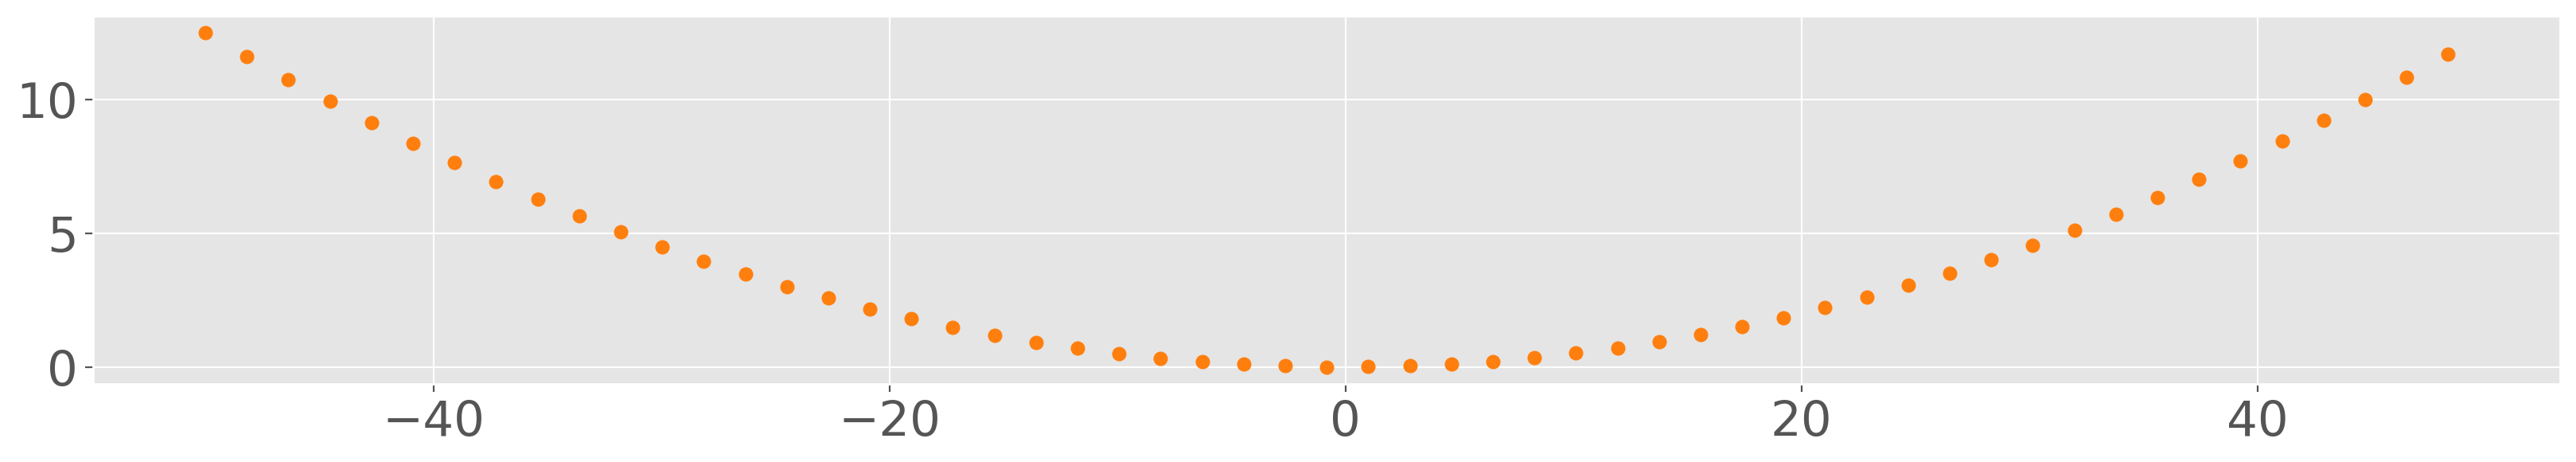

In [7]:
import torch.optim as optim
import matplotlib.pyplot as plt
import imageio.v3 as imageio  
import numpy as np


# Generate data
ndata = 550
x = np.linspace(-50, 50, ndata)
y = x**2 / 200
x_data = torch.tensor(x[0:550:10], dtype=torch.float32).unsqueeze(1)
y_data = torch.tensor(y[0:550:10], dtype=torch.float32).unsqueeze(1)

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(1, 132)
        self.fc2 = nn.Linear(132, 132)
        self.fc3 = nn.Linear(132, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = RegressionModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)

x_range = torch.tensor(np.linspace(-50, 50, 1000), dtype=torch.float32).unsqueeze(1)




class PerformancePlotCallback:
    def __init__(self, x_data, y_data, x_range, index, title):
        self.x_data = x_data
        self.y_data = y_data
        self.x_range = x_range
        self.index = index
        self.title = title
        self.images = []
        self.num_epochs = 500

    def __call__(self, epoch, loss):
        if epoch % (self.num_epochs // 10) == 0 or epoch == self.num_epochs - 1:
            with torch.no_grad():
                model.eval()
                y_pred = model(self.x_range.detach())  # Detach the tensor here
                model.train()  # Set the model back to training mode after obtaining y_pred
            
            # Convert y_pred to a NumPy array after detaching it
            y_pred = y_pred.detach().numpy()
            
            plt.figure()
            plt.scatter(self.x_data, self.y_data, color='tab:orange', label='Training data')
            plt.plot(self.x_range, y_pred, color='tab:blue', label='Predicted')
            plt.title(self.title)
            plt.xlabel('x')
            plt.ylabel('y')
            plt.legend()
            plt.savefig(f'./image_{epoch}.png')
            plt.close()

            image_path = f'./image_{epoch}.png'
            self.images.append(imageio.imread(image_path))

    def on_train_end(self):
        for epoch in range(0, self.num_epochs, self.num_epochs // 10):
            image_path = f'./image_{epoch}.png'
            plt.figure()
            plt.scatter(self.x_data, self.y_data, color='tab:orange', label='Training data')
            plt.plot(self.x_range, model(self.x_range.detach()), color='tab:blue', label='Predicted')  # Detach the tensor here
            plt.title(self.title)
            plt.xlabel('x')
            plt.ylabel('y')
            plt.legend()
            plt.savefig(image_path)
            plt.close()

            self.images.append(imageio.imread(image_path))

        imageio.mimsave('./para3.gif', self.images, fps=10)
 
        
        
performance = PerformancePlotCallback(x_data, y_data, x_range, 0, 'Regression')



# Training loop
epochs = 500
batch_size = 32

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(x_data.size(0))
    for i in range(0, x_data.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = x_data[indices], y_data[indices]
        
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    performance(epoch, loss.item())
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

performance.on_train_end()

In [ ]:
# Plotting the results
plt.figure()
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
plt.plot(x, x_tensor**2 / 200, lw=5, label="Exact solution")
plt.scatter(x_data, model(x_data).detach().numpy(), alpha=0.6,
            color='#FF0000', lw=1, edgecolor='black', label="prediction training data")

plt.plot(x, model(x_tensor).detach().numpy(), lw=3, label="prediction")
plt.ylim([-5, 20])
plt.xlabel('x')
plt.ylabel('$x^2/200$')

l = plt.legend(loc=(1.01, 0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")
plt.show()

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import imageio
import matplotlib.pyplot as plt
import imageio.v3 as imageio  
import numpy as np


# Generate data
ndata = 550
x = np.linspace(-50, 50, ndata)
y = x**2 / 200
x_data = torch.tensor(x[0:550:10], dtype=torch.float32).unsqueeze(1)
y_data = torch.tensor(y[0:550:10], dtype=torch.float32).unsqueeze(1)

# Convert the data to PyTorch tensors
x_data = torch.tensor(x[0:150:5], dtype=torch.float32).view(-1, 1)
y_data = torch.tensor(y[0:150:5], dtype=torch.float32).view(-1, 1)

# Define the PyTorch model
class MyModel2D(nn.Module):
    def __init__(self):
        super(MyModel2D, self).__init__()
        self.linear1 = nn.Linear(1, 132)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(132, 132)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(132, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.linear2(x)
        x = self.relu2(x)
        x = self.linear3(x)
        return x

# Create an instance of the model
model2d = MyModel2D()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model2d.parameters(), lr=1e-2)

# Training loop
epochs = 500
my_images = []
for epoch in range(epochs):
    # Forward pass
    y_pred = model2d(x_data)
    
    # Compute the loss
    loss = criterion(y_pred, y_data)
    
    # Zero gradients, backward pass, and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Plot the current state of the model and save it for the gif
    plt.plot(x, model2d(torch.tensor(x, dtype=torch.float32).view(-1, 1)).detach().numpy(), lw=3, label="prediction")
    plt.scatter(x_data, model2d(x_data).detach().numpy(), alpha=0.6, color='#FF0000', lw=1, edgecolor='black', label="prediction training data")
    plt.ylim([-5, 20])
    plt.xlabel('x')
    plt.ylabel('$x^2/200$')
    plt.legend(loc=(1.01, 0.34), frameon=False, fontsize="large")
    plt.title(f"RegressionQ Epoch: {epoch+1}")
    
    plt.savefig(f"./plot_{epoch+1:03d}.png")
    my_images.append(imageio.imread(f"./plot_{epoch+1:03d}.png"))
    plt.close()

# Save images as a gif
imageio.mimsave('./para2.gif', my_images, fps=10)
# Plot the loss over epochs
plt.figure()
plt.plot(range(1, epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Progress')
plt.show()



In [ ]:
#Other
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10.0, 10.0, 101)

# No need for GradientTape, PyTorch automatically tracks gradients for tensors with requires_grad=True
x.requires_grad = True

# Define the function y
y = torch.exp(-x**2/2)

# Calculate the gradient of y with respect to x
dy_dx = torch.autograd.grad(y, x, torch.ones_like(y), create_graph=True)[0]

# Plotting
plt.plot(x.detach().numpy(), y.detach().numpy(), label='y')
plt.plot(x.detach().numpy(), dy_dx.detach().numpy(), label='dy/dx')
plt.legend()
plt.xlabel('x')
plt.ylabel('y and dy/dx')
plt.show()

In [ ]:
import torch

x = torch.tensor(3.0, requires_grad=True)

# Since y = x**2, we can directly compute y without using the GradientTape
y = x**2

# Calculate the gradient of y with respect to x
dy_dx = torch.autograd.grad(y, x)[0]

# Access the gradient value as a NumPy array
gradient_value = dy_dx.item()

print("Gradient:", gradient_value)

In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-10.0, 10.0, 200 + 1, requires_grad=True)

# Using the torch.sigmoid() function instead of tf.nn.sigmoid()
# to calculate the sigmoid activation
y = torch.sigmoid(x)

# Compute the first derivative (dy/dx) using automatic differentiation
y_x = torch.autograd.grad(y, x, torch.ones_like(y), create_graph=True)[0]

# Compute the second derivative (y_xx) using automatic differentiation
y_xx = torch.autograd.grad(y_x, x, torch.ones_like(y_x), create_graph=True)[0]

# Convert tensors to NumPy arrays for plotting
x_np = x.detach().numpy()
y_np = y.detach().numpy()
y_x_np = y_x.detach().numpy()
y_xx_np = y_xx.detach().numpy()

# Plot the results
plt.plot(x_np, y_np, label='y')
plt.plot(x_np, y_x_np, label='dy/dx')
plt.plot(x_np, y_xx_np, label='y_xx')
plt.legend()
plt.xlabel('x')
plt.show()

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x = torch.linspace(-10.0, 10.0, 101, dtype=torch.float32, requires_grad=True)

# Compute y = exp(-x**2/2) using PyTorch
y = torch.exp(-x**2/2)

# Compute the first derivative (dy/dx) using PyTorch's torch.autograd.grad function
y_x = torch.autograd.grad(y, x, torch.ones_like(y), create_graph=True)[0]

# Convert tensors to NumPy arrays for plotting
x_np = x.detach().numpy()
y_np = y.detach().numpy()
y_x_np = y_x.detach().numpy()

# Plot the results
plt.plot(x_np, y_np, label='y')
plt.plot(x_np, y_x_np, label='dy/dx')
plt.legend()
plt.xlabel('x')
plt.show()

In [ ]:
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

xt = torch.linspace(-10.0, 10.0, 101, requires_grad=True)

# Compute yt = sin(xt) using PyTorch
yt = torch.sin(xt)

# Compute the first derivative (dy/dx) using PyTorch's autograd
dydxAD = torch.autograd.grad(yt, xt, torch.ones_like(yt), create_graph=True)[0]

# Convert tensors to NumPy arrays for plotting
xt_np = xt.detach().numpy()
yt_np = yt.detach().numpy()
dydxAD_np = dydxAD.detach().numpy()

# numpy gradient
x = np.linspace(-10, 10, 101)
y = np.sin(x)
y_x = np.gradient(y, x)

# Plot the results
plt.plot(x, y, label='y')
plt.plot(x, y_x, label='dy/dx (NumPy)')
plt.plot(xt_np, yt_np, label='yt')
plt.plot(xt_np, dydxAD_np, label='dy/dx (PyTorch)')
plt.legend()
plt.xlabel('x')
plt.show()